With clean data, we can start to compare our dataframes and visualize how air pollution and asthma intersect based on our dataframes. To get a better sense of how to test our hypothesis, we started by importing our data into this new file and creating some simple **diagnostic plots**.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import scipy.stats as stats

asthma = pd.read_csv('../group5-project/Datasets/California_Asthma_Data_ADA.csv', header = 4)
aqi2015 = pd.read_csv('../group5-project/Datasets/annual_aqi_by_county_2015.csv')
aqi2016 = pd.read_csv('../group5-project/Datasets/annual_aqi_by_county_2016.csv')

asthmalist = ['County', 'Year', 'Asthma measure', 'Comparison', 'Group',
       'County prevalence', 'County 95% confidence interval',
       'California prevalence', 'California 95% confidence interval']

ca_asthma = asthma[asthmalist]

ca_aqi2015 = aqi2015.loc[aqi2015['State']=='California',:].reset_index(drop=True)
ca_aqi2016 = aqi2016.loc[aqi2016['State']=='California',:].reset_index(drop=True)

ca_aqi = pd.concat([ca_aqi2015, ca_aqi2016], axis = 0)
ca_asthma2015 = ca_asthma.loc[ca_asthma['Year']=='2015 2016',:].reset_index(drop=True)

print(ca_aqi.head())
ca_asthma2015.head()

        State     County  Year  Days with AQI  Good Days  Moderate Days  \
0  California    Alameda  2015            365        214            139   
1  California     Alpine  2015             31          1             14   
2  California     Amador  2015            364        283             73   
3  California      Butte  2015            365        170            182   
4  California  Calaveras  2015            365        245             98   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                   12               0                    0   
1                                   13               3                    0   
2                                    8               0                    0   
3                                   12               1                    0   
4                                   18               2                    1   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0 

,County,Year,Asthma measure,Comparison,Group,County prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
0,Alameda,2015 2016,Lifetime asthma prevalence,Total population,All ages,14.30%,(10.7 17.9),14.80%,(14.0 15.7)
1,Alpine,2015 2016,Lifetime asthma prevalence,Total population,All ages,14.20%,(7.2 21.1),14.80%,(14.0 15.7)
2,Amador,2015 2016,Lifetime asthma prevalence,Total population,All ages,14.20%,(7.2 21.1),14.80%,(14.0 15.7)
3,Butte,2015 2016,Lifetime asthma prevalence,Total population,All ages,14.70%,(7.8 21.6),14.80%,(14.0 15.7)
4,Calaveras,2015 2016,Lifetime asthma prevalence,Total population,All ages,14.20%,(7.2 21.1),14.80%,(14.0 15.7)


First, we wanted to find out what the best data to compare would be to most best capture the correlative relationship between asthma prevalance and AQI (or lackthereof).

Our intuition was to use the median AQI compare with counties in CA, because we thought the median AQI would likely be an accurate reflection of the county's overall air quality.

We made **scatterplot** to compare median AQI the number of Good Days in a county to ensure this metric would give an accurate estimate of the overall air quality in a county

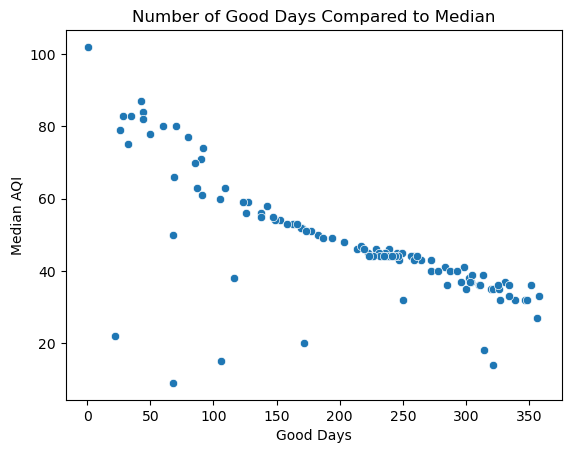

In [2]:
MedianGoodDays = sns.scatterplot(data=ca_aqi, x='Good Days', y='Median AQI')
plt.title('Number of Good Days Compared to Median')
plt.show()

In [3]:
stats.pearsonr(ca_aqi['Good Days'], ca_aqi['Median AQI'])

PearsonRResult(statistic=-0.7413430258037454, pvalue=4.531676569870009e-20)

We can see there is a strong negative correlation between the number of Good Days a county has and its median AQI; this means that the median likely gives an accurate reflection of general air quality based on how many days there are no issues with AQI.

From there, we needed find a way to compare county prevelance from our asthma dataset with median AQI so we could test our hypothesis.

To start, we combined our datasets based on county name

In [4]:
asthmaAQI = pd.merge(ca_aqi, ca_asthma2015, on=['County', 'County'])
asthmaAQI

,State,County,Year_x,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days PM2.5,Days PM10,Year_y,Asthma measure,Comparison,Group,County prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
0,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Total population,All ages,14.30%,(10.7 17.9),14.80%,(14.0 15.7)
1,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Child vs. adult,0 17 years,18.40%,(6.2 30.6),14.50%,(12.2 16.8)
2,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Child vs. adult,18+ years,13.10%,(9.2 17.0),14.90%,(14.0 15.9)
3,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Age group,0 4 years,Not available,Not available,4.90%,(2.9 7.0)
4,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Age group,5 17 years,24.10%,(5.9 42.2),18.20%,(15.2 21.2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,California,Yolo,2016,366,293,69,4,0,0,0,...,83,1,2015 2016,Current asthma prevalence,Child vs. adult,18+ years,7.80%,(0.5 15.1),8.30%,(7.7 8.9)
1508,California,Yolo,2016,366,293,69,4,0,0,0,...,83,1,2015 2016,Current asthma prevalence,Age group,0 4 years,Not available,Not available,4.50%,(2.3 6.6)
1509,California,Yolo,2016,366,293,69,4,0,0,0,...,83,1,2015 2016,Current asthma prevalence,Age group,5 17 years,Not available,Not available,12.30%,(9.7 14.9)
1510,California,Yolo,2016,366,293,69,4,0,0,0,...,83,1,2015 2016,Current asthma prevalence,Age group,18 64 years,Not available,Not available,8.10%,(7.4 8.9)


Next, we needed to separate age groups in our asthma dataset into their own dataframes.
The age groups CA divided people into were:

All ages

0 17 years 

18+ years

0 4 years

5 17 years

18 64 years

65+ years

In [5]:
asthmaAQI_017 = asthmaAQI.loc[asthmaAQI['Group']=='0 17 years',:].reset_index(drop=True)
asthmaAQI_18up = asthmaAQI.loc[asthmaAQI['Group']=='18+ years',:].reset_index(drop=True)
asthmaAQI_04 = asthmaAQI.loc[asthmaAQI['Group']=='0 4 years',:].reset_index(drop=True)
asthmaAQI_517 = asthmaAQI.loc[asthmaAQI['Group']=='5 17 years',:].reset_index(drop=True)
asthmaAQI_1864 = asthmaAQI.loc[asthmaAQI['Group']=='18 64 years',:].reset_index(drop=True)
asthmaAQI_65up = asthmaAQI.loc[asthmaAQI['Group']=='65+ years',:].reset_index(drop=True)

print(asthmaAQI_017['Group'])
print(asthmaAQI_18up['Group'])
print(asthmaAQI_04['Group'])
print(asthmaAQI_517['Group'])
print(asthmaAQI_1864['Group'])
print(asthmaAQI_65up['Group'])

0      0 17 years
1      0 17 years
2      0 17 years
3      0 17 years
4      0 17 years
          ...    
211    0 17 years
212    0 17 years
213    0 17 years
214    0 17 years
215    0 17 years
Name: Group, Length: 216, dtype: object
0      18+ years
1      18+ years
2      18+ years
3      18+ years
4      18+ years
         ...    
211    18+ years
212    18+ years
213    18+ years
214    18+ years
215    18+ years
Name: Group, Length: 216, dtype: object
0      0 4 years
1      0 4 years
2      0 4 years
3      0 4 years
4      0 4 years
         ...    
211    0 4 years
212    0 4 years
213    0 4 years
214    0 4 years
215    0 4 years
Name: Group, Length: 216, dtype: object
0      5 17 years
1      5 17 years
2      5 17 years
3      5 17 years
4      5 17 years
          ...    
211    5 17 years
212    5 17 years
213    5 17 years
214    5 17 years
215    5 17 years
Name: Group, Length: 216, dtype: object
0      18 64 years
1      18 64 years
2      18 64 years
3      18 64 

We also had to make sure the 'Asthma measure' we were looking at was 'Current asthma prevalence' as opposed to 'Lifetime asthma prevalence.' We wanted to focus on current asthma prevalence since the AQI data we wanted to compare it to was from the same year.

In [6]:
asthmaAQI_017_2015 = asthmaAQI_017[asthmaAQI_017["Asthma measure"].str.contains("Current asthma prevalence")]
asthmaAQI_18up_2015 = asthmaAQI_18up[asthmaAQI_18up["Asthma measure"].str.contains("Current asthma prevalence")]
asthmaAQI_04_2015 = asthmaAQI_04[asthmaAQI_04["Asthma measure"].str.contains("Current asthma prevalence")]
asthmaAQI_517_2015 = asthmaAQI_517[asthmaAQI_517["Asthma measure"].str.contains("Current asthma prevalence")]
asthmaAQI_18up_2015 = asthmaAQI_18up[asthmaAQI_18up["Asthma measure"].str.contains("Current asthma prevalence")]
asthmaAQI_1864_2015 = asthmaAQI_1864[asthmaAQI_1864["Asthma measure"].str.contains("Current asthma prevalence")]
asthmaAQI_65up_2015 = asthmaAQI_65up[asthmaAQI_65up["Asthma measure"].str.contains("Current asthma prevalence")]

asthmaAQI_017_2015

,State,County,Year_x,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days PM2.5,Days PM10,Year_y,Asthma measure,Comparison,Group,County prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
1,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,15.10%,(3.9 26.4),10.10%,(8.2 12.0)
3,California,Alameda,2016,366,239,112,13,2,0,0,...,137,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,15.10%,(3.9 26.4),10.10%,(8.2 12.0)
5,California,Alpine,2015,31,1,14,13,3,0,0,...,31,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,Not available,Not available,10.10%,(8.2 12.0)
7,California,Alpine,2016,24,22,2,0,0,0,0,...,24,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,Not available,Not available,10.10%,(8.2 12.0)
9,California,Amador,2015,364,283,73,8,0,0,0,...,0,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,Not available,Not available,10.10%,(8.2 12.0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,California,Tuolumne,2016,354,223,86,38,7,0,0,...,0,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,Not available,Not available,10.10%,(8.2 12.0)
209,California,Ventura,2015,365,183,169,13,0,0,0,...,131,4,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,Not available,Not available,10.10%,(8.2 12.0)
211,California,Ventura,2016,366,173,184,9,0,0,0,...,127,7,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,Not available,Not available,10.10%,(8.2 12.0)
213,California,Yolo,2015,365,236,125,4,0,0,0,...,133,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,Not available,Not available,10.10%,(8.2 12.0)


We got rid of missing data, converted everything to floats, and renamed our dataframes to make them easier to type

In [28]:
aa17 = asthmaAQI_017_2015.replace('Not available', np.NaN)
aa18 = asthmaAQI_18up_2015.replace('Not available', np.NaN)
aa04 = asthmaAQI_04_2015.replace('Not available', np.NaN)
aa517 = asthmaAQI_517_2015.replace('Not available', np.NaN)
aa18up = asthmaAQI_18up_2015.replace('Not available', np.NaN)
aa1864 = asthmaAQI_1864_2015.replace('Not available', np.NaN)
aa65up = asthmaAQI_65up_2015.replace('Not available', np.NaN)

aa17['California prevalence'] = aa17['California prevalence'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100
aa18['California prevalence'] = aa18['California prevalence'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100
aa04['California prevalence'] = aa04['California prevalence'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100
aa517['California prevalence'] = aa517['California prevalence'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100
aa18up['California prevalence'] = aa18up['California prevalence'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100
aa1864['California prevalence'] = aa1864['California prevalence'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100
aa65up['California prevalence'] = aa65up['California prevalence'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100

aa17.head()

,State,County,Year_x,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days PM2.5,Days PM10,Year_y,Asthma measure,Comparison,Group,County prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
1,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,15.10%,(3.9 26.4),0.101,(8.2 12.0)
3,California,Alameda,2016,366,239,112,13,2,0,0,...,137,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,15.10%,(3.9 26.4),0.101,(8.2 12.0)
5,California,Alpine,2015,31,1,14,13,3,0,0,...,31,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,NaN,NaN,0.101,(8.2 12.0)
7,California,Alpine,2016,24,22,2,0,0,0,0,...,24,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,NaN,NaN,0.101,(8.2 12.0)
9,California,Amador,2015,364,283,73,8,0,0,0,...,0,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,NaN,NaN,0.101,(8.2 12.0)


From there, we were finally ready to start making comparisons between our asthma data and our AQI data

In [23]:
#I kept getting an error message that said county prevalance needs to be a string
#County prevalence is written as a percentage, which I think is what is causing the problem?
#I converted the values to strings, but that's getting weird results because the percentages are not in order
#Also would like to remove NaN values from scatterplot

plt.scatter(aa17["Good Days"], aa17["County prevalence"])
plt.xlabel("Good Days")
plt.ylabel("County Prevalence")
plt.title("Comparison of Good Days and County Prevalence")
plt.show()

KeyError: 'Good Days'